In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Load the data

In [2]:
train=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
print(train.shape)
train.head(10)

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Put the labels into y_train**

In [4]:
y_train=train['label']
X_train=train.drop('label',axis=1,inplace=True)

In [5]:
X_train=train.copy()

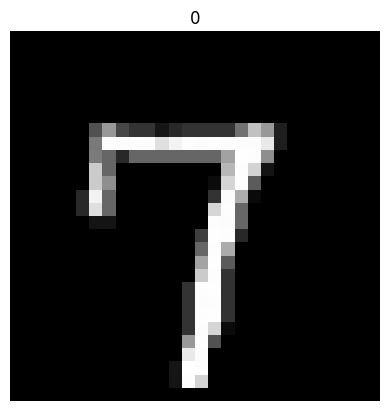

In [6]:
img=X_train.iloc[6].to_numpy()
img=img.reshape(28,28)
plt.imshow(img,cmap='gray')
plt.title(X_train.iloc[8,0])
plt.axis('off')
plt.show()

In [7]:
X_train.iloc[0,0]

0

In [8]:
X_train/=255

In [9]:
X_train=X_train.values.reshape(-1,28,28,1)
print('X_train Shape : ',X_train.shape)

X_train Shape :  (42000, 28, 28, 1)


In [10]:
# One hot encoding 

from keras.utils import to_categorical
y_train=to_categorical(y_train,num_classes=10)

2024-05-09 10:33:40.971158: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 10:33:40.971267: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 10:33:41.098407: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Train and Val set split

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [12]:
print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_val.shape)
print("y_train Shape : ",y_train.shape)
print('y_test Shape : ',y_val.shape)

X_train Shape :  (33600, 28, 28, 1)
X_test Shape :  (8400, 28, 28, 1)
y_train Shape :  (33600, 10)
y_test Shape :  (8400, 10)


# CNN Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten , Dense


model=Sequential([
    
    
    # First Convolution Block
    Conv2D(filters=8,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)),
    
    MaxPool2D(pool_size=(2,2)),
    
    # Second Convolution Block
    
    Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'),
    
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    
    
    # Fully Connected Layers 
    
    Flatten(),
    
    Dense(256,activation='relu'),
    
    Dense(10,activation='softmax')
      
    
])

# Compile The Model

In [14]:
from keras.optimizers import Adam

optimizer=Adam()

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

# Train the Model

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator()

datagen.fit(X_train)

In [16]:
train_data=datagen.flow(X_train,y_train,batch_size=250)

**Fit the Model**

In [17]:
history= model.fit(train_data,epochs=10,validation_data=(X_val,y_val),steps_per_epoch=X_train.shape[0]//250)

Epoch 1/10


2024-05-09 10:33:56.481723: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10374: 6.65852, expected 5.86115
2024-05-09 10:33:56.481855: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19613: 6.66338, expected 5.86602
2024-05-09 10:33:56.481897: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 22736: 6.69502, expected 5.89765
2024-05-09 10:33:56.481910: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 22918: 6.8586, expected 6.06124
2024-05-09 10:33:56.481927: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 23702: 7.27675, expected 6.44553
2024-05-09 10:33:56.481956: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 25885: 6.96377, expected 6.16641
2024-05-09 10:33:56.481969: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 26054: 6.61684, expected 5.81948
2024-05-09 10:33:56.481988: 

 14/134 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3676 - loss: 2.0365

I0000 00:00:1715250838.244822      68 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


104/134 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7071 - loss: 1.0537

2024-05-09 10:33:59.898750: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 7.81811, expected 6.909
2024-05-09 10:33:59.898837: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2561: 7.39072, expected 6.4956
2024-05-09 10:33:59.898848: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2744: 8.56832, expected 7.57264
2024-05-09 10:33:59.898857: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2757: 6.95863, expected 5.96295
2024-05-09 10:33:59.898891: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8833: 7.31098, expected 6.41586
2024-05-09 10:33:59.898901: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9029: 7.82559, expected 6.82991
2024-05-09 10:33:59.898911: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9603: 7.88599, expected 6.97688
2024-05-09 10:33:59.898930: E external/

128/134 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7344 - loss: 0.9560

2024-05-09 10:34:01.921805: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4998: 7.36267, expected 6.52074
2024-05-09 10:34:01.921888: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8231: 7.26224, expected 6.42031
2024-05-09 10:34:01.921914: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11354: 7.40711, expected 6.56518
2024-05-09 10:34:01.921923: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11367: 7.27901, expected 6.43708
2024-05-09 10:34:01.921976: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 20775: 7.1319, expected 6.28998
2024-05-09 10:34:01.921998: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 23716: 6.89077, expected 6.04884
2024-05-09 10:34:01.922007: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 23729: 7.15251, expected 6.31059
2024-05-09 10:34:01.922018: E 

134/134 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.7411 - loss: 0.9319 - val_accuracy: 0.9449 - val_loss: 0.1906
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9440 - loss: 0.1895 - val_accuracy: 0.9444 - val_loss: 0.1907
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9572 - loss: 0.1439 - val_accuracy: 0.9574 - val_loss: 0.1443
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9800 - loss: 0.1052 - val_accuracy: 0.9574 - val_loss: 0.1427
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9720 - loss: 0.0907 - val_accuracy: 0.9667 - val_loss: 0.1036
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9840 - loss: 0.0773 - val_accuracy: 0.9661 - val_loss: 0.1079
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9794 - loss: 0.0694 - val_accuracy: 0.9767 - val_loss: 0.0768
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9800 - loss: 0.0526 - val_accuracy: 0.9765 -

In [18]:
history.history['accuracy']

[0.8650375008583069,
 0.9440000057220459,
 0.9609895348548889,
 0.9800000190734863,
 0.9738830327987671,
 0.984000027179718,
 0.9803898334503174,
 0.9800000190734863,
 0.9840179681777954,
 0.9959999918937683]

In [19]:
history.history['val_accuracy']

[0.9448809623718262,
 0.9444047808647156,
 0.9573809504508972,
 0.9573809504508972,
 0.9666666388511658,
 0.9660714268684387,
 0.9766666889190674,
 0.9765475988388062,
 0.9703571200370789,
 0.9714285731315613]

In [20]:
history.history['loss']

[0.4863834083080292,
 0.18951712548732758,
 0.12666146457195282,
 0.10522960126399994,
 0.08428490161895752,
 0.07733238488435745,
 0.06500028818845749,
 0.05264804884791374,
 0.05183719843626022,
 0.0233756136149168]

# Plot Results

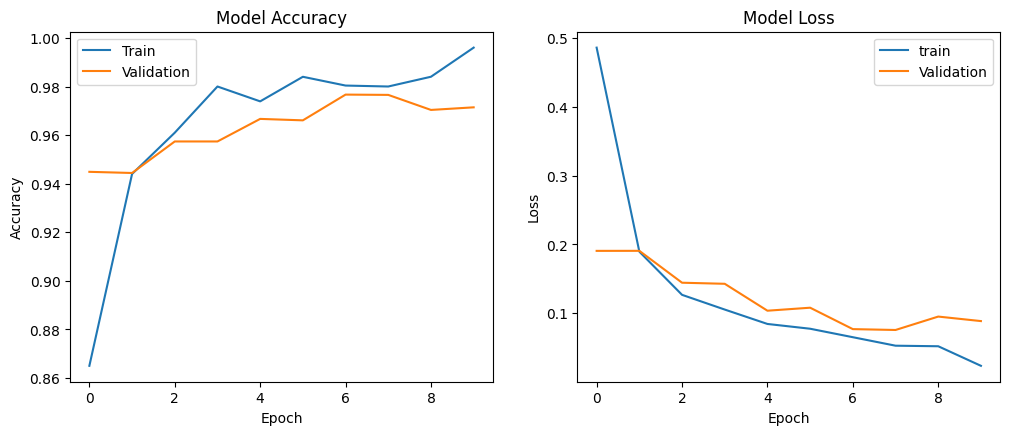

In [21]:

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='best')


plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','Validation'],loc='best')

plt.show()

# Results

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


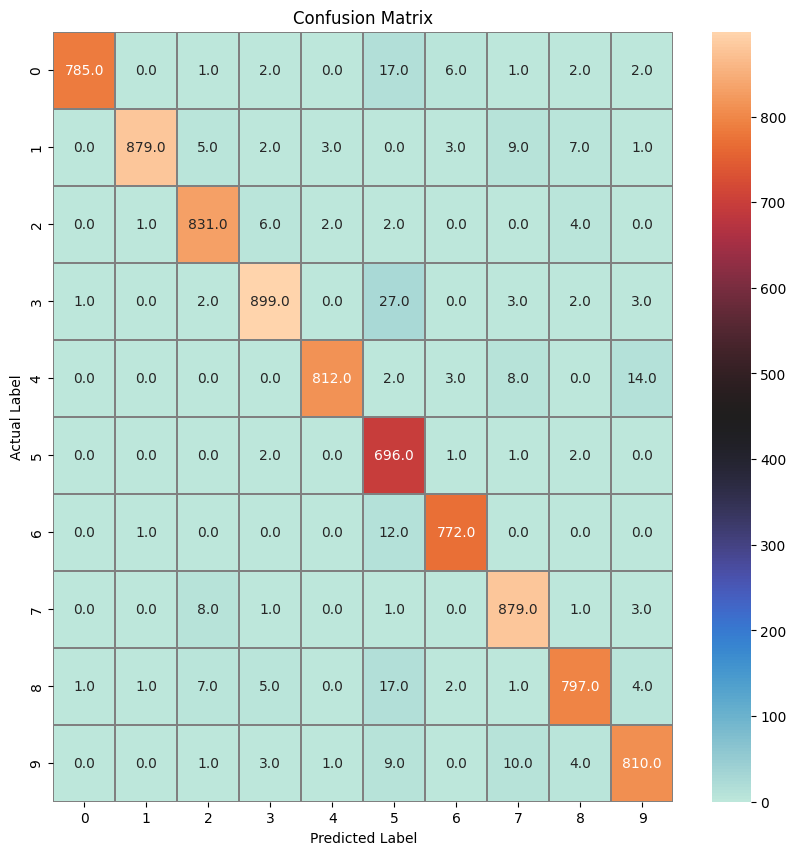

In [22]:
from sklearn.metrics import confusion_matrix

# predict the values from validation dataset
y_pred = model.predict(X_val)

# convert prediction class to one vector 
y_pred_classes = np.argmax(y_pred,axis=1)

# Convert the validation observations to one hot vectors 
y_true = np.argmax(y_val,axis=1)

# Compute Confusion Matrix
cm = confusion_matrix(y_true,y_pred_classes)

fig ,ax = plt.subplots(figsize=(10,10))

sns.heatmap(cm,annot=True,cmap='icefire',linewidths=0.01,linecolor='gray',fmt='0.1f',ax=ax)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
fig.show()

In [23]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_true,y_pred_classes)*100
print(f'The score of  this model is : {score:0.2f}%')

The score of  this model is : 97.14%
